# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [16]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Check if Keras is available
print("Is Keras available in TensorFlow?", hasattr(tf, 'keras'))


TensorFlow version: 2.10.0
Is Keras available in TensorFlow? True


In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [19]:
# Your code here

# Explore the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [20]:
# Inspect the dimensions of a single image
print(f"Single image shape: {x_train[0].shape}")

# Check the range of pixel values
print(f"Pixel value range: Min={x_train.min()}, Max={x_train.max()}")

Single image shape: (32, 32, 3)
Pixel value range: Min=0, Max=255


In [21]:
# Find the unique classes in the training labels
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

print(f"Number of unique classes: {num_classes}")
print(f"Unique class labels: {unique_classes}")

Number of unique classes: 100
Unique class labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


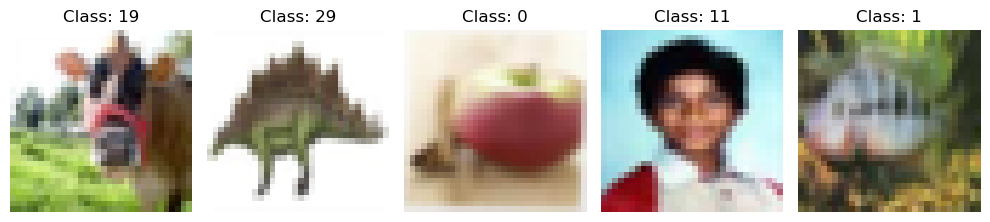

In [22]:
# Show a few examples from the training set
num_examples = 5
plt.figure(figsize=(10, 5))

for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [23]:
# Your code here

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split training data into training and validation sets (80% train, 20% val)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}, Validation labels shape: {y_val.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (40000, 32, 32, 3), Training labels shape: (40000, 100)
Validation data shape: (10000, 32, 32, 3), Validation labels shape: (10000, 100)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the CNN model
def create_baseline_model():
    model = Sequential()
    
    # Convolutional Layer 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Convolutional Layer 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the feature map
    model.add(Flatten())
    
    # Fully Connected Layer 1
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output Layer
    model.add(Dense(units=100, activation='softmax'))  # 100 classes for CIFAR-100
    
    return model

# Instantiate the model
baseline_model = create_baseline_model()

# Print the model summary
baseline_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [25]:
from keras import optimizers

# Your code here

from tensorflow.keras.optimizers import Adam

# Compile the model
baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = baseline_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
625/625 [==============================] - 21s 32ms/step - loss: 4.2000 - accuracy: 0.0600 - val_loss: 3.7277 - val_accuracy: 0.1419
Epoch 2/10
625/625 [==============================] - 19s 30ms/step - loss: 3.7226 - accuracy: 0.1265 - val_loss: 3.3752 - val_accuracy: 0.2049
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 3.4882 - accuracy: 0.1652 - val_loss: 3.1907 - val_accuracy: 0.2286
Epoch 4/10
625/625 [==============================] - 20s 32ms/step - loss: 3.3425 - accuracy: 0.1905 - val_loss: 3.0595 - val_accuracy: 0.2609
Epoch 5/10
625/625 [==============================] - 24s 39ms/step - loss: 3.2423 - accuracy: 0.2092 - val_loss: 2.9428 - val_accuracy: 0.2805
Epoch 6/10
625/625 [==============================] - 27s 43ms/step - loss: 3.1433 - accuracy: 0.2271 - val_loss: 2.8575 - val_accuracy: 0.2970
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 3.0829 - accuracy: 0.2395 - val_loss: 2.8231 - val_accuracy:

Loss function = categorical_crossentropy because it is the standard loss function for multi-class classification problems. By measuring the difference between the predicted probability distribution from the softmax layer and the true lables (one-hot encoded) it helps the model learn and minimize prediction errors. 

Optimizer = Adam because it adjusts the learning rate dynamically for each parameter making it bery effective for deep learning tasks 

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Create the Enhanced CNN model
def create_enhanced_model():
    model = Sequential()
    
    # First Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second Convolutional Block
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third Convolutional Block
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(units=100, activation='softmax'))  # 100 classes for CIFAR-100

    return model

# Instantiate the model
enhanced_model = create_enhanced_model()

# Print the model summary
enhanced_model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_7 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                      

In [27]:
# Compile the model
enhanced_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [29]:
# Your code here

# Train the model
history = enhanced_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1250/1250 [==============================] - 182s 146ms/step - loss: 4.1176 - accuracy: 0.0643 - val_loss: 3.8006 - val_accuracy: 0.1079
Epoch 2/20
1250/1250 [==============================] - 188s 150ms/step - loss: 3.9402 - accuracy: 0.0822 - val_loss: 3.7102 - val_accuracy: 0.1208
Epoch 3/20
1250/1250 [==============================] - 201s 161ms/step - loss: 3.7749 - accuracy: 0.1057 - val_loss: 3.3375 - val_accuracy: 0.1850
Epoch 4/20
1250/1250 [==============================] - 210s 168ms/step - loss: 3.6137 - accuracy: 0.1304 - val_loss: 3.3790 - val_accuracy: 0.1772
Epoch 5/20
1250/1250 [==============================] - 208s 166ms/step - loss: 3.4492 - accuracy: 0.1575 - val_loss: 3.1539 - val_accuracy: 0.2324
Epoch 6/20
1250/1250 [==============================] - 203s 162ms/step - loss: 3.2858 - accuracy: 0.1883 - val_loss: 3.1671 - val_accuracy: 0.2387
Epoch 7/20
1250/1250 [==============================] - 205s 164ms/step - loss: 3.1002 - accuracy: 0.2250 - val_

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [30]:
# Your code here

from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = enhanced_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate and report another metric: F1-score
y_pred = enhanced_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

classification_rep = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract and print the F1-score
f1_score_macro = classification_rep['macro avg']['f1-score']
print(f"Macro Average F1-Score: {f1_score_macro:.4f}")

# F1-score (Macro Average)
print("Other Metric: F1-score (Macro Average)")
print("Reason for selection: F1-score is useful in evaluating the balance between precision and recall across all classes, especially in multi-class problems where class imbalance might exist. It provides a better understanding of how well the model is handling different classes compared to accuracy.")
print(f"Value of Metric: {f1_score_macro:.4f}")
print("Interpretation of Metric Value: The F1-score indicates the balance between precision and recall. A higher value means that the model is achieving a good balance between correctly classifying positive samples and minimizing false positives and false negatives across all classes.")


313/313 [==============================] - 19s 60ms/step - loss: 2.7627 - accuracy: 0.4389
Test Accuracy: 0.4389
313/313 [==============================] - 19s 59ms/step
Macro Average F1-Score: 0.4417
Other Metric: F1-score (Macro Average)
Reason for selection: F1-score is useful in evaluating the balance between precision and recall across all classes, especially in multi-class problems where class imbalance might exist. It provides a better understanding of how well the model is handling different classes compared to accuracy.
Value of Metric: 0.4417
Interpretation of Metric Value: The F1-score indicates the balance between precision and recall. A higher value means that the model is achieving a good balance between correctly classifying positive samples and minimizing false positives and false negatives across all classes.


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

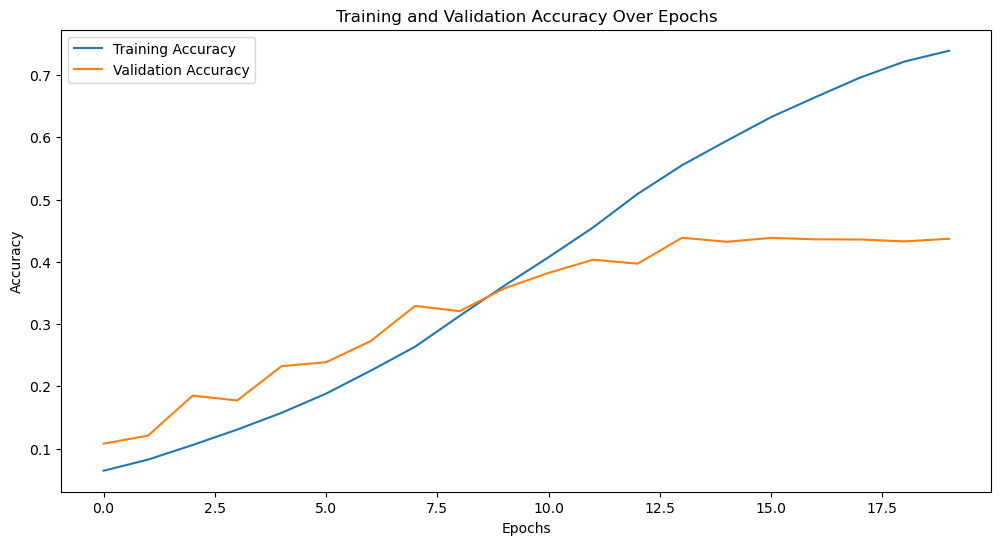

Classification Probabilities for Correctly Classified Image: [1.1571710e-11 4.7908593e-09 1.0188972e-09 1.6267360e-05 8.4981913e-08
 3.2235548e-09 1.5741306e-09 9.3680363e-08 1.4262709e-08 3.9584211e-07
 1.5395910e-09 1.2900129e-09 1.6685089e-04 1.0077645e-09 1.6900598e-08
 3.4063374e-09 4.6667068e-08 1.3084585e-05 5.5723493e-05 4.9584044e-09
 8.8528390e-10 4.9760640e-09 1.4556282e-08 2.8675708e-03 1.4835540e-06
 9.4382665e-07 6.1521477e-09 3.6282781e-06 1.4645007e-08 4.7206903e-08
 2.0657739e-02 8.5728516e-08 3.3743153e-09 1.4500639e-06 4.4785544e-09
 1.1795086e-10 4.2026525e-11 1.4768944e-05 1.0427326e-05 3.2332525e-04
 8.2684261e-07 2.0439030e-09 7.5996427e-09 4.5983998e-11 1.2130421e-06
 2.3770284e-08 1.9952427e-07 1.9929653e-08 1.2273895e-07 9.4130623e-01
 1.4159755e-07 1.6246947e-08 1.0088151e-08 1.2678150e-10 1.9352318e-07
 3.3498529e-06 2.6609949e-05 1.1068340e-09 3.1609524e-09 1.8153194e-05
 9.8832079e-06 1.3536927e-08 1.4612361e-08 8.3531688e-09 8.5258520e-09
 8.3037371e-08 4

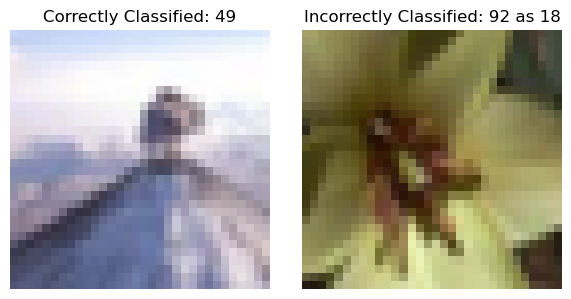

In [31]:
# Your code here

# Task 3c: Visualize the model's learning
# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Select an image that the model correctly classified and one that it incorrectly classified
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Plot a correctly classified image
correct_index = correct_indices[0]
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f"Correctly Classified: {y_true[correct_index]}")
plt.axis('off')
print(f"Classification Probabilities for Correctly Classified Image: {y_pred[correct_index]}")

# Plot an incorrectly classified image
incorrect_index = incorrect_indices[0]
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f"Incorrectly Classified: {y_true[incorrect_index]} as {y_pred_classes[incorrect_index]}")
plt.axis('off')
print(f"Classification Probabilities for Incorrectly Classified Image: {y_pred[incorrect_index]}")

plt.tight_layout()
plt.show()

- Training Accuracy Increasing: The training accuracy steadily rises, indicating effective learning from the training set.
- Validation Accuracy Plateau: Validation accuracy increases initially but plateaus around 30-35%, suggesting difficulty in generalizing to unseen data.
- Overfitting Detected: The divergence between training and validation accuracy implies that the model overfits after approximately 10-12 epochs.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [33]:
# Your code here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Implement data augmentation to improve model performance
# Data augmentation to increase dataset diversity and reduce overfitting

data_augmentation = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)



### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [34]:
# Your code here

# Re-train the enhanced model with the same number of epochs
history = enhanced_model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=20,  # Same number of epochs as before
    batch_size=32
)


Epoch 1/20
1250/1250 [==============================] - 227s 181ms/step - loss: 2.5480 - accuracy: 0.3657 - val_loss: 2.2508 - val_accuracy: 0.4365
Epoch 2/20
1250/1250 [==============================] - 200s 160ms/step - loss: 2.2814 - accuracy: 0.4110 - val_loss: 2.0415 - val_accuracy: 0.4745
Epoch 3/20
1250/1250 [==============================] - 205s 164ms/step - loss: 2.2001 - accuracy: 0.4263 - val_loss: 2.4282 - val_accuracy: 0.4189
Epoch 4/20
1250/1250 [==============================] - 201s 161ms/step - loss: 2.1355 - accuracy: 0.4378 - val_loss: 2.0414 - val_accuracy: 0.4767
Epoch 5/20
1250/1250 [==============================] - 204s 163ms/step - loss: 2.0701 - accuracy: 0.4520 - val_loss: 2.0329 - val_accuracy: 0.4737
Epoch 6/20
1250/1250 [==============================] - 192s 153ms/step - loss: 2.0346 - accuracy: 0.4608 - val_loss: 1.9971 - val_accuracy: 0.4756
Epoch 7/20
1250/1250 [==============================] - 180s 144ms/step - loss: 1.9913 - accuracy: 0.4706 - val_

313/313 [==============================] - 15s 46ms/step - loss: 1.8279 - accuracy: 0.5396
Re-trained Test Accuracy: 0.5396
313/313 [==============================] - 14s 46ms/step
Re-trained Macro Average F1-Score: 0.5299


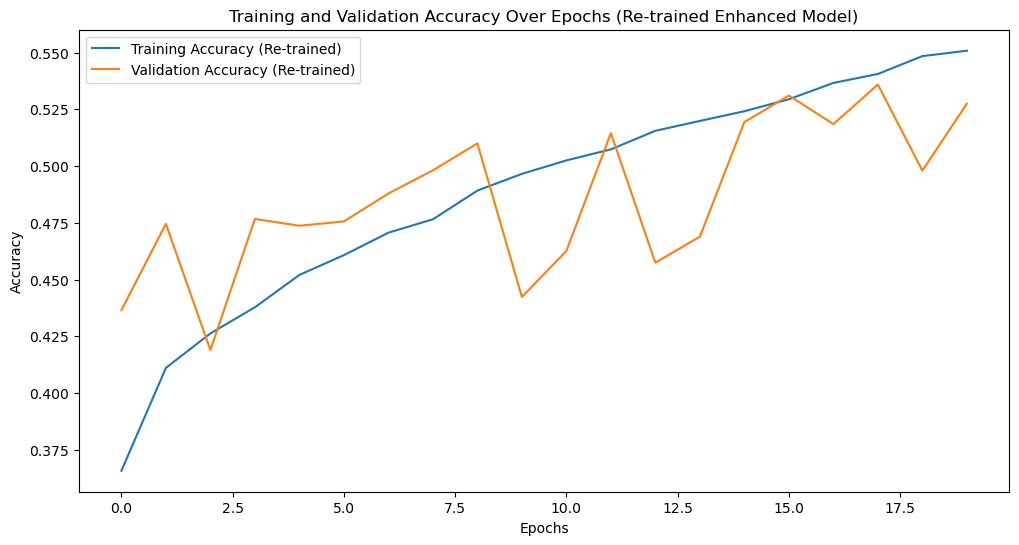

Classification Probabilities for Correctly Classified Image (Re-trained): [1.88717042e-09 1.39715585e-05 1.27816492e-07 4.46799168e-05
 4.02235855e-06 6.93976326e-05 2.55128015e-07 4.63517296e-07
 6.27690647e-03 2.29837387e-04 9.87166345e-07 1.47341666e-07
 4.49780084e-04 2.55594878e-05 1.35879461e-07 2.54742554e-06
 4.20098222e-05 2.14802349e-04 5.53156387e-05 8.25959523e-06
 8.47957011e-08 1.76158073e-06 3.70722455e-06 3.47425544e-06
 1.08460553e-10 1.74106273e-04 4.44292390e-08 1.90035571e-04
 4.34548127e-07 2.35816497e-05 2.38964446e-07 2.85874150e-04
 6.05852438e-05 8.91952217e-01 8.92955995e-06 7.78545143e-07
 4.25260360e-08 9.35011916e-03 2.52251310e-04 6.59842917e-05
 1.91952995e-06 1.62617580e-05 1.61376185e-04 1.48327160e-07
 1.06918105e-05 4.96026587e-06 1.62826370e-06 1.76723290e-04
 9.18171452e-07 2.97026577e-06 6.64593317e-05 4.53374741e-06
 6.68252833e-05 1.50890217e-10 1.23624241e-05 1.03547964e-05
 9.98418982e-05 1.55502232e-06 2.83891654e-06 1.05680889e-02
 1.91766367

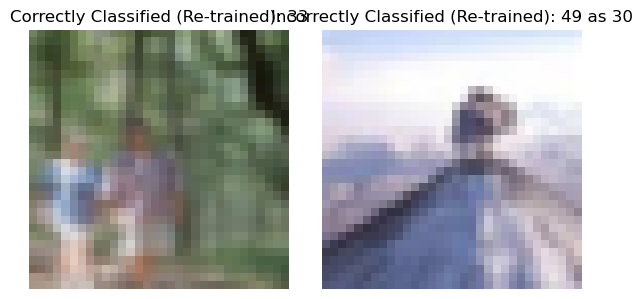

In [35]:
# Evaluate the re-trained model on the test set
retrained_test_loss, retrained_test_accuracy = enhanced_model.evaluate(x_test, y_test)
print(f"Re-trained Test Accuracy: {retrained_test_accuracy:.4f}")

# Calculate and report another metric: F1-score for the re-trained model
y_pred_retrained = enhanced_model.predict(x_test)
y_pred_classes_retrained = np.argmax(y_pred_retrained, axis=1)
y_true_retrained = np.argmax(y_test, axis=1)

classification_rep_retrained = classification_report(y_true_retrained, y_pred_classes_retrained, output_dict=True)

# Extract and print the F1-score
retrained_f1_score_macro = classification_rep_retrained['macro avg']['f1-score']
print(f"Re-trained Macro Average F1-Score: {retrained_f1_score_macro:.4f}")

# Task 4b: Visualize the model's learning after re-training
# Plot training and validation accuracy over epochs for re-trained model
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy (Re-trained)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Re-trained)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs (Re-trained Enhanced Model)')
plt.legend()
plt.show()

# Select an image that the re-trained model correctly classified and one that it incorrectly classified
correct_indices_retrained = np.where(y_pred_classes_retrained == y_true_retrained)[0]
incorrect_indices_retrained = np.where(y_pred_classes_retrained != y_true_retrained)[0]

# Plot a correctly classified image for re-trained model
correct_index_retrained = correct_indices_retrained[0]
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index_retrained])
plt.title(f"Correctly Classified (Re-trained): {y_true_retrained[correct_index_retrained]}")
plt.axis('off')
print(f"Classification Probabilities for Correctly Classified Image (Re-trained): {y_pred_retrained[correct_index_retrained]}")

# Plot an incorrectly classified image for re-trained model
incorrect_index_retrained = incorrect_indices_retrained[0]
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index_retrained])
plt.title(f"Incorrectly Classified (Re-trained): {y_true_retrained[incorrect_index_retrained]} as {y_pred_classes_retrained[incorrect_index_retrained]}")
plt.axis('off')
print(f"Classification Probabilities for Incorrectly Classified Image (Re-trained): {y_pred_retrained[incorrect_index_retrained]}")

plt.tight_layout()
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

## Your answer here

### Task 4c: Discussion of the Results

The re-trained enhanced model shows an improvement in validation accuracy compared to the initial model. The re-trained model reached a validation accuracy around **50-55%**, whereas the original model plateaued at approximately **30-35%**. This improvement is likely due to **data augmentation** and **additional training**, which enhanced the model's ability to generalize to unseen data.

However, the validation accuracy still fluctuates significantly, suggesting that the model is not fully optimized, and there is potential for further improvements. The gap between training and validation accuracy also implies that the model might still be slightly overfitting.

**Room for Improvement**: There is room for further improvement as the current accuracy is below **60%**, and the consistency of the validation accuracy is an issue. Techniques such as **hyperparameter tuning**, increasing **regularization**, and experimenting with different architectures could help.

**Future Techniques**: To enhance performance, **early stopping** could prevent overfitting, and **transfer learning** might leverage pre-trained models to achieve better accuracy. Further **model depth** or adjusting **learning rates** could also be explored to optimize the model.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.